In [70]:
using LsqFit
using PyPlot
G = 6.67e-8

6.67e-8

In [75]:
# QUICKSORT FOR A traditional row-based array with multiple columns
function quicksort2D!(a::Array)#,left,right)
    
    lena = length(a[:,1])
#    a0 = zeros(Float64,1,lena)
    
    if(lena < 2)
        return# a
    end
    
    if(lena == 2)
        if(a[1,1] > a[2,1])
            a[1,:],a[2,:] = a[2,:],a[1,:]
        end
        return# a
    end
         
    if(lena > 2)
        pivot = a[div(lena,2)]
        i = 1
        j = lena

        while(i <= j)
            
            while(a[i,1] < pivot)
                i = i + 1
            end
            
            while(a[j,1] > pivot)
                j = j - 1
            end

            if(i <= j)
                a[i,:], a[j,:] = a[j,:], a[i,:]
                i = i + 1
                j = j - 1
            end
        end

        #a[1:i,:] = 
        quicksort2D!(a[1:i,:])
        #a[i:end,:] = 
        quicksort2D!(a[i:end,:]) 

    end
   
    return# a
    
end

#From Jake & Dave
function fastsortrows(B::AbstractMatrix,cols::Array; kws...)
  """
  Solution by: abhishekmalali (gihub)
  See: https://github.com/JuliaLang/julia/issues/9832
  """
       for i = 1:length(cols)
        if i == 1
            p =sortperm(B[:,cols[i]]; kws...);
            B = B[p,:];
        else
            i0_old = 0;
            i1_old = 0;
            i0_new = 0;
            i1_new = 0;
            for j = 1:size(B,1)-1
                if B[j,cols[1:i-1]] == B[j+1,cols[1:i-1]] && i0_old == i0_new
                    i0_new = j;
                elseif B[j,cols[1:i-1]] != B[j+1,cols[1:i-1]] && i0_old != i0_new && i1_new == i1_old
                    i1_new = j;
                elseif i0_old != i0_new && j == size(B,1)-1
                    i1_new = j+1;
                end
                if i0_new != i0_old && i1_new != i1_old
                    p = sortperm(B[i0_new:i1_new,cols[i]]; kws...);
                    B[i0_new:i1_new,:] = B[i0_new:i1_new,:][p,:];
                    i0_old = i0_new;
                    i1_old = i1_new;
                end
            end
            end
    end
    return B
end

LoadError: LoadError: syntax: unexpected end
while loading In[75], in expression starting on line 97

In [9]:
#@time quicksort2D(a)
a = rand(Float64,1000000,2)
@time sortrows(a, by=x->x[1])

  6.143442 seconds (94.21 M allocations: 1.493 GB, 4.30% gc time)


1000000x2 Array{Float64,2}:
 3.61645e-6  0.493348 
 3.84436e-6  0.446206 
 5.40444e-6  0.0268972
 5.84407e-6  0.890817 
 5.85303e-6  0.215715 
 9.04728e-6  0.454795 
 9.29694e-6  0.882097 
 9.31918e-6  0.339162 
 9.63941e-6  0.690753 
 9.78651e-6  0.662416 
 1.20838e-5  0.0127466
 1.38276e-5  0.642373 
 1.4402e-5   0.743133 
 ⋮                    
 0.999981    0.562876 
 0.999982    0.404426 
 0.999983    0.932705 
 0.999988    0.282066 
 0.999989    0.409268 
 0.999989    0.642049 
 0.999991    0.504129 
 0.999991    0.432761 
 0.999992    0.73409  
 0.999992    0.888738 
 0.999994    0.555864 
 0.999996    0.883459 

In [10]:
b = rand(Float64,1000000,2)
@time quicksort2D!(b)

  2.067496 seconds (45.42 M allocations: 2.372 GB, 19.87% gc time)


In [11]:
c = rand(Float64,1000000,2)
@time fastsortrows(c,[1])

  0.228218 seconds (77.72 k allocations: 33.757 MB, 1.01% gc time)


1000000x2 Array{Float64,2}:
 9.97089e-7  0.162249 
 2.99426e-6  0.404899 
 3.83035e-6  0.998901 
 3.86674e-6  0.156196 
 5.25898e-6  0.641918 
 8.80292e-6  0.563281 
 9.39195e-6  0.408529 
 1.01867e-5  0.16398  
 1.34837e-5  0.35036  
 1.47133e-5  0.412004 
 1.52293e-5  0.243719 
 1.62139e-5  0.738751 
 1.63745e-5  0.444888 
 ⋮                    
 0.999989    0.221199 
 0.99999     0.0298826
 0.999991    0.372691 
 0.999991    0.0545946
 0.999991    0.720291 
 0.999991    0.0435137
 0.999991    0.637878 
 0.999995    0.35117  
 0.999996    0.196257 
 0.999997    0.622988 
 0.999998    0.103294 
 1.0         0.956116 

In [12]:
#Data import
pldata = readdlm("mystery_planet.txt")
time_data = pldata[:,1]
RV_data = pldata[:,2]
err_data = pldata[:,3]

59-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.3
 1.3
 1.2
 1.1
 1.1
 1.1
 1.2
 1.2
 1.1
 1.2
 ⋮  
 1.0
 1.2
 1.3
 1.3
 1.3
 1.2
 1.3
 1.4
 1.5
 1.2
 1.1
 1.4

In [13]:
#Sort by phase, given period
phase = Array(Real,length(time_data))
period = 10.
phase = mod(time_data,period)

59-element Array{Float64,1}:
 3.82196
 3.82264
 3.82336
 5.16632
 5.16702
 5.16775
 0.12242
 0.12308
 0.12372
 1.11653
 1.11724
 1.11797
 9.10185
 ⋮      
 6.7334 
 7.73062
 1.94048
 2.72022
 2.7208 
 2.72139
 3.02461
 3.02698
 3.03026
 5.72624
 8.73474
 5.1871 

In [14]:
phase_data_arr1 = [phase RV_data] #combine arrays
@time phase_sorted1 = sortrows(phase_data_arr1, by=x->x[1]) #sort by phase
#phase_sorted2 = sort(phase_data_arr,1) #sort by phase

  0.001097 seconds (1.50 k allocations: 30.650 KB)


59x2 Array{Float64,2}:
 0.12242   321.0
 0.12308   318.4
 0.12372   319.2
 1.11653   290.6
 1.11724   291.0
 1.11797   291.7
 1.16959    95.0
 1.80566   -30.5
 1.84867  -237.2
 1.94048  -113.1
 2.72022  -177.0
 2.7208   -170.0
 2.72139  -172.8
 ⋮              
 7.00429    68.3
 7.16184    12.3
 7.18024  -180.8
 7.73062  -237.0
 7.92941  -221.9
 8.10796  -213.6
 8.73474  -142.7
 8.8737   -227.3
 9.10185    90.7
 9.1025     91.1
 9.10312    87.7
 9.16606    46.7

In [15]:
phase_data_arr2 = [phase RV_data] #combine arrays
@time phase_sorted2 = sortrows(phase_data_arr2, by=x->x[1]) #sort by phase

  0.001223 seconds (1.50 k allocations: 30.650 KB)


59x2 Array{Float64,2}:
 0.12242   321.0
 0.12308   318.4
 0.12372   319.2
 1.11653   290.6
 1.11724   291.0
 1.11797   291.7
 1.16959    95.0
 1.80566   -30.5
 1.84867  -237.2
 1.94048  -113.1
 2.72022  -177.0
 2.7208   -170.0
 2.72139  -172.8
 ⋮              
 7.00429    68.3
 7.16184    12.3
 7.18024  -180.8
 7.73062  -237.0
 7.92941  -221.9
 8.10796  -213.6
 8.73474  -142.7
 8.8737   -227.3
 9.10185    90.7
 9.1025     91.1
 9.10312    87.7
 9.16606    46.7

In [16]:
newsorted1 = [phase RV_data] #combine arrays
@time quicksort2D(newsorted1)#,1,length(newsorted[:,1]))

LoadError: LoadError: UndefVarError: quicksort2D not defined
while loading In[16], in expression starting on line 155

In [17]:
newsorted2 = [phase RV_data] #combine arrays
@time quicksort2D(newsorted2)#,1,length(newsorted[:,1]))

LoadError: LoadError: UndefVarError: quicksort2D not defined
while loading In[17], in expression starting on line 155

In [18]:
newsorted3 = [phase RV_data]
@time quicksort2D(newsorted3)#,1,length(newsorted[:,1]))

LoadError: LoadError: UndefVarError: quicksort2D not defined
while loading In[18], in expression starting on line 155

In [19]:
[phase RV_data]

59x2 Array{Float64,2}:
 3.82196  -217.7
 3.82264  -221.0
 3.82336  -217.8
 5.16632  -203.3
 5.16702  -204.2
 5.16775  -203.6
 0.12242   321.0
 0.12308   318.4
 0.12372   319.2
 1.11653   290.6
 1.11724   291.0
 1.11797   291.7
 9.10185    90.7
 ⋮              
 6.7334   -238.4
 7.73062  -237.0
 1.94048  -113.1
 2.72022  -177.0
 2.7208   -170.0
 2.72139  -172.8
 3.02461   379.9
 3.02698   382.7
 3.03026   386.1
 5.72624  -185.9
 8.73474  -142.7
 5.1871     24.3

In [20]:
plot(phase_data_arr[:,1],phase_data_arr[:,2],".")

LoadError: LoadError: UndefVarError: phase_data_arr not defined
while loading In[20], in expression starting on line 1

In [21]:
period = linspace(1,3500,100000)
sum = Array(Real,length(period))

for (j,P) in enumerate(period)
    sum[j] = 0.0
    #Sort by phase given period
    phase = Array(Real,length(time_data))
    phase = mod(time_data,P)
    phase_data_arr = [phase RV_data] #combine arrays
    phase_sorted = sortrows(phase_data_arr, by=x->x[1]) #sort by phase
    for i in 2:length(time_data)
        sum[j] += (phase_sorted[i,2]-phase_sorted[i-1,2])*(phase_sorted[i,2]-phase_sorted[i-1,2])
    end
end
sum

100000-element Array{Real,1}:
 2.58033e6
 3.21359e6
 3.02553e6
 3.14458e6
 3.03096e6
 3.8313e6 
 3.94352e6
 3.38432e6
 3.59938e6
 3.4122e6 
 2.62869e6
 3.32299e6
 2.87204e6
 ⋮        
 3.20805e6
 3.20805e6
 3.20805e6
 3.20805e6
 3.20805e6
 3.20805e6
 3.20805e6
 3.20805e6
 3.20805e6
 3.20805e6
 3.20805e6
 3.20805e6

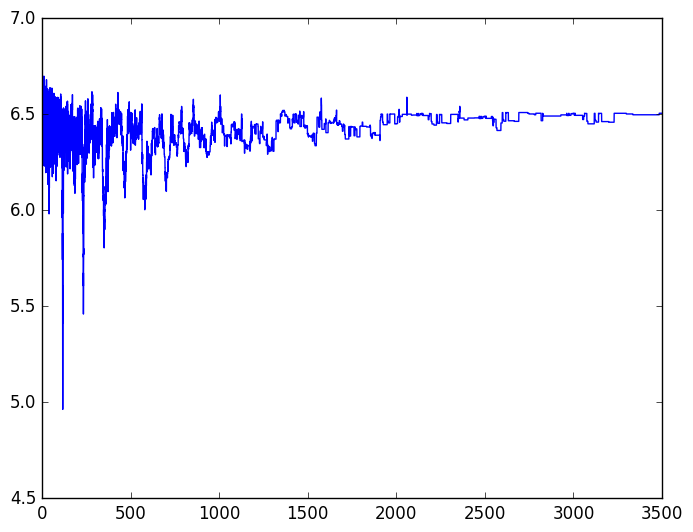

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb8ccfcda10>

In [22]:
plot(period,log10(sum))

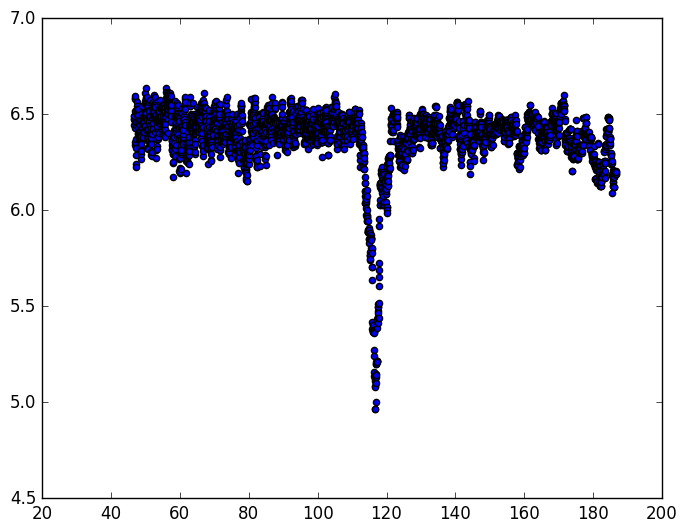

PyObject <matplotlib.collections.PathCollection object at 0x7fb8ccec7cd0>

In [23]:
min_index=indmin(sum)
min_per=period[min_index]
npts = 2000
scatter(period[min_index-npts:min_index+npts],log10(sum[min_index-npts:min_index+npts]))

In [24]:
P = min_per
sum = 0.0
#Sort by phase given period
phase = Array(Real,length(time_data))
phase = mod(time_data,P)
phase_data_arr = [phase RV_data] #combine arrays
phase_sorted = sortrows(phase_data_arr, by=x->x[1]) #sort by phase
for i in 2:length(time_data)
    sum += (phase_sorted[i,2]-phase_sorted[i-1,2])*(phase_sorted[i,2]-phase_sorted[i-1,2])
end

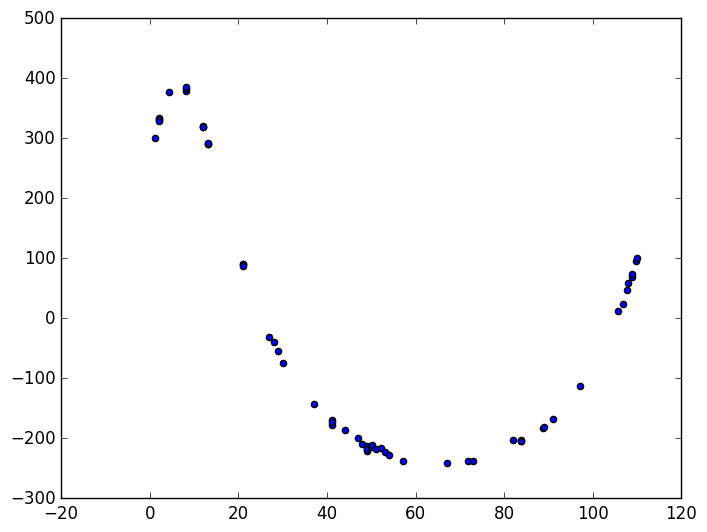

PyObject <matplotlib.collections.PathCollection object at 0x7fb8cce0c790>

In [25]:
scatter(phase_sorted[:,1],phase_sorted[:,2])

### K, $\varpi, \gamma$ Analytical Solution

In [26]:
; pwd

/home/linc/Documents/598_exoplanets/ExoJulia/Homework/hw2/Andrew_Spencer


In [27]:
# THIS DOESN'T WORK. WORKING AROUND IT (FOLLOWING CELL)
push!(LOAD_PATH, "/home/linc/Documents/SCHOOL/598_exoplanets/ExoJulia/ExoJulia/")
# import
using ExoJulia

# Call kepler_solve!()
#M = 0.1;
#ecc = 0.0;
#E = ExoJulia.Orbit.kepler_solve!(M, ecc)

LoadError: LoadError: ArgumentError: ExoJulia not found in path
while loading In[27], in expression starting on line 4

In [36]:
include("/home/linc/Documents/598_exoplanets/ExoJulia/ExoJulia/Orbit/orbit.jl")

Orbit

In [60]:
#Functions
function f_val(time,ecc,period,time_peri)
    
    M = 2*pi/period*(time-time_peri)
    
    if(length(M) > 1)
        E = Array(Float64,length(M))
        f = Array(Float64,length(M))
        
        for i in 1:length(M)
            E[i] = Orbit.kepler_solve!(M[i],ecc)
            f[i] = 2*atan(sqrt((1+ecc)/(1-ecc))*tan(E[i]/2))
        end
        return f 
    else 
        E = Orbit.kepler_solve!(M,ecc)
        f = 2*atan(sqrt((1+ecc)/(1-ecc))*tan(E/2))
        return f
    end
end

function B_func(time_data,P,err_data,ecc,time_peri)   
    F = Array(Float64,4,length(time_data))

    for i in 1:length(time_data)
        F[1,i] = cos(f_val(time_data[i],ecc,P,time_peri))
        F[2,i] = sin(f_val(time_data[i],ecc,P,time_peri))
        F[3,i] = 1.0
        F[4,i] = time_data[i]-time_data[1]
    end
    
    W = zeros(Real,length(time_data),length(time_data))
    #W[:,:] = 0.0

    for i in 1:length(time_data)
        W[i,i] = (err_data[i])^(-2)
    end

    B = RV_data'*W*F'*inv(F*W*F')
    return B   
end

function vrad_model(x,p)
        
    ecc = p[1]
    time_peri = p[2]
    
    B = B_func(time_data,P,err_data,ecc,time_peri)
  
    #B = {h,c,v0,d}
    h = B[1]
    c = B[2]
    v0 = B[3]
    #K = sqrt(h*h + c*c)
    #curlypi = atan(-c/h)
    #gam = v0 - K*ecc*cos(curlypi)
    f = f_val(x,ecc,P,time_peri)
    vrad = h*cos(f) + c*sin(f) + v0
    return vrad

end

vrad_model (generic function with 1 method)

In [61]:
#Will loop over these
ecc = 0.1
time_peri = 0.0 #presumably in days
p = [ecc,time_peri]

vrad_model(time_data,p)

59-element Array{Float64,1}:
 -217.582 
 -217.589 
 -217.596 
 -222.142 
 -222.135 
 -222.127 
  259.297 
  259.292 
  259.287 
  251.854 
  251.848 
  251.842 
  163.184 
    ⋮     
 -301.792 
 -298.642 
  -32.7568
 -127.947 
 -127.954 
 -127.962 
  278.46  
  278.454 
  278.445 
 -164.412 
  -73.3951
  136.909 

In [62]:
fit = curve_fit(vrad_model,time_data,RV_data,err_data,[ecc,time_peri])

LsqFit.LsqFitResult{Float64}(57,[0.4019938242422242,6.685781960104779],[5.11114,8.40864,5.20598,-3.13922,-1.96533,-2.53041,-3.28277,-0.440252,-1.3372,2.97301  …  -0.0945099,4.80753,-4.29727,-0.611214,7.07074,3.66884,-1.20744,-5.52112,-1.26405,9.77039],59x2 Array{Float64,2}:
  163.756     -6.64213 
  163.765     -6.64195 
  163.774     -6.64176 
  231.462      4.37562 
  231.45       4.3758  
  213.635      4.03937 
  123.654      6.79023 
  123.573      6.79065 
  123.494      6.79105 
    4.78438    7.73914 
    4.6948     7.73913 
    4.21914    7.0942  
 -476.191     -1.77865 
    ⋮                  
  269.599      0.295637
  319.244      0.710322
  -86.0739     4.76543 
   44.4299   -10.8644  
   44.4448   -10.8643  
   41.04     -10.0285  
  638.46      -1.49508 
  687.388     -1.60029 
  736.214     -1.70008 
  106.79      -9.39171 
  -58.4265    -9.62752 
 -399.139     -3.8467  )

In [63]:
fit.param

2-element Array{Float64,1}:
 0.401994
 6.68578 

In [40]:
testarr = Array(Real,4,8)
testarr[:,:] = 1.0
testarr[:,1]

4-element Array{Real,1}:
 1.0
 1.0
 1.0
 1.0

In [41]:
F = Array(Real,4,length(time_data))

for i in 1:length(time_data)
    F[1,i] = cos(f_val(time_data[i],ecc,P,time_peri))
    F[2,i] = sin(f_val(time_data[i],ecc,P,time_peri))
    F[3,i] = 1.0
    F[4,i] = time_data[i]-time_data[1]
end

W = zeros(Real,length(time_data),length(time_data))
#W[:,:] = 0.0

for i in 1:length(time_data)
    W[i,i] = (err_data[i])^(-2)
end

B = RV_data'*W*F'*inv(F*W*F')

#B = {h,c,v0,d}
h = B[1]
c = B[2]
v0 = B[3]
K = sqrt(h*h + c*c)
curlypi = atan(-c/h)
gam = v0 - K*ecc*cos(curlypi)

-40.75528673939246

In [42]:
F

4x59 Array{Real,2}:
 -0.91697   -0.916983  -0.916996   -0.380286  …    -0.564969     0.802629
  0.398955   0.398927   0.398897   -0.924869        0.825112    -0.596479
  1.0        1.0        1.0         1.0             1.0          1.0     
  0.0        0.00068    0.0014    151.344        2554.91      2741.37    

In [44]:
B,K,curlypi,gam

(
1x4 Array{Real,2}:
 271.966  113.701  -13.5586  -0.00395699,

294.7773872358867,-0.3959867537711906,-40.75528673939246)

In [ ]:
#Will loop over these
for i in 
ecc = 0.1
time_peri = 0.0 #presumably in days

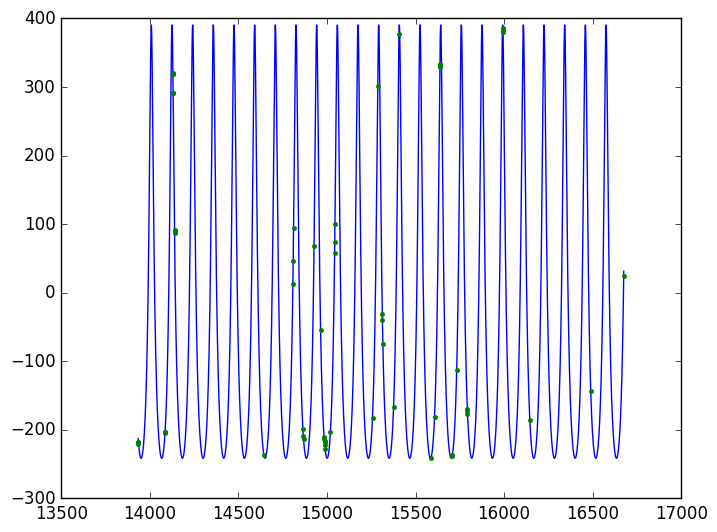

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb8cc792650>

In [127]:
time_data_calc = linspace(minimum(time_data),maximum(time_data),10000)
plot(time_data_calc,vrad_model(time_data_calc,fit.param))
plot(time_data,RV_data,".")

# 3. f & g functions

In [71]:
a = (G*mass*(period/(2*pi))^2)^(1/3)
r0 = (a,0)
v0 = (0,sqrt(G*mass*(2/r0 - 1/a)))

M0 = 2*pi/period*(t0-time_peri)
E0 = Orbit.kepler_solve!(M0,ecc)

function f_func(t,t0,E0,M0,a)
    
    M = 2*pi/period*(t-time_peri)
    E = Orbit.kepler_solve!(M,ecc) 
    a*(cos(E-E0) + 1)/r0
    
end


function g_func(t,t0,E0,M0)
    
    M = 2*pi/period*(t-time_peri)
    E = Orbit.kepler_solve!(M,ecc) 
    (t-t0) + period(sin(E-E0) - (E-E0))/(2*pi)
    
end

LoadError: LoadError: UndefVarError: mass not defined
while loading In[71], in expression starting on line 1

In [129]:
function ms_merge(b,c,a,Na::Int32,Nb::Int32,Nc::Int32)

    j = 1
    k = 1

    for i in 1:Na
        if((j <= Nb) && (k <= Nc))
            if(b[j,1] <= c[k,1])
	        a[i,:] = b[j,:]
	        j = j + 1
            elseif(k <= Nc)
	        a[i,:] = c[k,:]
	        k = k + 1
            end
        elseif(j <= Nb)
            a[i,:] = b[j,:]
            j = j + 1
        elseif(k <= Nc)
            a[i,:] = c[k,:]
            k = k + 1
        else
            println("Possible error\n")
            println("j = $j, b[j] = $(b[j,1]), k = $k, c[k] = $(c[k,1])\n")
        end
    end
end

function ms_sort(a,N::Int32)

    if(N < 2)
 #       println("N < 2, returning\n")
        return
    end

    N1 = div(N,2)
    b = Array(Float64,N1,2)
    c = Array(Float64,N-N1,2)

    for i in 1:N1
        b[i,:] = a[i,:]
    end
    for i in (N1+1):N
        #println("$i")
        c[i-N1,:] = a[i,:]
    end

    ms_sort(b,N1)
    ms_sort(c,N-N1)
    ms_merge(b,c,a,N,N1,N-N1)

end

function mergesort(a,N)

    ms_sort(a,N)

end

mergesort (generic function with 1 method)

In [130]:
a = rand(Float64,1000000,2)
@time mergesort(a,1000000)

  5.046636 seconds (138.53 M allocations: 5.427 GB, 17.32% gc time)
